# Data cleaning and preprocessing

In [1]:
import pandas as pd
import numpy as np
import warnings
# suppress the warning caused by setting the first column as index column
warnings.simplefilter(action='ignore', category=FutureWarning) 
data = pd.read_csv('cic2017-ddos-data.csv', index_col=0, header=0)
# dataset contains infinite values in some columns
data = data.replace('inf', np.inf)
print('Label column information:')
print(data.loc[:, 'Label'].describe())
data = data.replace(np.nan, np.inf)
data['Flow Bytes/s'].replace(np.inf, data['Flow Bytes/s'].median(), inplace=True)
data['Flow Packets/s'].replace(np.inf, data['Flow Packets/s'].median(), inplace=True)
# drop two duplicated columns
data = data.drop(['Fwd Header Length - dupl'], axis=1)
print('Dataset after dropping duplicated column: ')
print('Number of instances = {}'.format(data.shape[0]))
print('Number of attributes = {}'.format(data.shape[1]))

Label column information:
count     755663
unique         2
top       BENIGN
freq      627636
Name: Label, dtype: object
Dataset after dropping duplicated column: 
Number of instances = 755663
Number of attributes = 84


# Data visualization

In [2]:
# stratify subsetting the dataset to visualize
from sklearn.model_selection import train_test_split

y = data.loc[:, 'Label']
x = data.drop(['Label'], axis=1)

x_taken, x_left, y_taken, y_left = train_test_split(x, y, test_size=0.5, random_state=2, stratify=y)
x_taken = x_taken.drop(['Flow ID', 'Source IP', 'Source Port', 'Destination IP', 'Destination Port', 'Protocol', 'Timestamp'], axis=1)
visualizedData = pd.concat([x_taken, y_taken], axis=1)
visualizedData.head()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,Min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
45387,14590096,7,5,358.0,3131.0,208.0,0.0,51.142857,82.638628,1460.0,...,20,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,BENIGN
675305,501155,3,4,26.0,11601.0,20.0,0.0,8.666667,10.263203,8675.0,...,20,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,DDoS
92638,3167328,6,8,542.0,3423.0,342.0,0.0,90.333333,143.818868,1460.0,...,20,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,BENIGN
248279,117249521,22,22,8367.0,5414.0,3984.0,0.0,380.318182,947.613714,1368.0,...,20,223943.363636,626671.834418,2113430.0,34869.0,1.000318e+07,5437.415606,10015888.0,9999715.0,BENIGN
248506,30412,1,1,54.0,110.0,54.0,54.0,54.000000,0.000000,110.0,...,20,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,0.0,0.0,BENIGN


## Andrews curves
<p>Continuous version of parallel coordinates</p>

<AxesSubplot:>

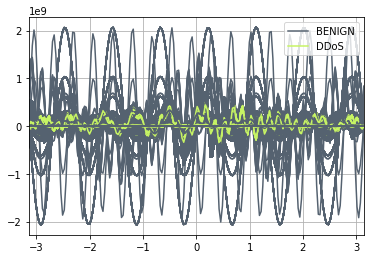

In [3]:
# andrews curves on partial data
pd.plotting.andrews_curves(visualizedData, 'Label', color=('#556270', '#C7F464'))